In [ ]:
import matplotlib.pyplot as plt

# Print available styles
print(plt.style.available)

# Use a style from the list, for example:
plt.style.use('ggplot')


In [ ]:
from google.colab import files
uploaded = files.upload()  # A prompt will appear to select your files


Saving co2_emissions_kt_by_country.csv to co2_emissions_kt_by_country (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GlobalLandTemperaturesByCountry (1).csv to GlobalLandTemperaturesByCountry (1) (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WDIData (1).csv to WDIData (1) (1).csv


In [ ]:
!ls


'co2_emissions_kt_by_country (1).csv'	        sample_data
 co2_emissions_kt_by_country.csv	       'WDIData (1) (1).csv'
'GlobalLandTemperaturesByCountry (1) (1).csv'  'WDIData (1).csv'
'GlobalLandTemperaturesByCountry (1).csv'


In [ ]:
import pandas as pd

wdi = pd.read_csv('WDIData (1).csv')
temperature = pd.read_csv('GlobalLandTemperaturesByCountry (1).csv')
co2 = pd.read_csv('co2_emissions_kt_by_country.csv')

# Quick previews
print("WDI dataset preview:")
print(wdi.head())

print("\nTemperature dataset preview:")
print(temperature.head())

print("\nCO2 dataset preview:")
print(co2.head())


WDI dataset preview:
  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name     Indicator Code  1960  \
0  2005 PPP conversion factor, GDP (LCU per inter...      PA.NUS.PPP.05   NaN   
1  2005 PPP conversion factor, private consumptio...  PA.NUS.PRVT.PP.05   NaN   
2  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2010       2011       2012  \
0   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
1   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
2   NaN   NaN   NaN   NaN   NaN  ...  82.407647  82.827636  83.169227   
3   NaN   NaN

In [ ]:
print("WDI dataset missing values:")
print(wdi.isnull().sum())

print("\nTemperature dataset missing values:")
print(temperature.isnull().sum())

print("\nCO2 dataset missing values:")
print(co2.isnull().sum())


WDI dataset missing values:
Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              383840
                   ...  
2015              200346
2016              209146
2017              235535
2018              391889
Unnamed: 63       422136
Length: 64, dtype: int64

Temperature dataset missing values:
dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

CO2 dataset missing values:
country_code    0
country_name    0
year            0
value           0
dtype: int64


In [ ]:
temperature['dt'] = pd.to_datetime(temperature['dt'], errors='coerce')
temperature['Year'] = temperature['dt'].dt.year


In [ ]:
wdi_long = pd.melt(wdi,
                   id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
                   var_name="Year",
                   value_name="Value")
# Optionally, convert Year to numeric
wdi_long['Year'] = pd.to_numeric(wdi_long['Year'], errors='coerce')


In [ ]:
co2 = co2.rename(columns={'value': 'CO2_Emissions'})


In [ ]:
# Convert 'dt' to datetime and extract the year
temperature['dt'] = pd.to_datetime(temperature['dt'], errors='coerce')
temperature['Year'] = temperature['dt'].dt.year

# Create temperature_clean by dropping rows with missing AverageTemperature values
temperature_clean = temperature.dropna(subset=['AverageTemperature'])

# Rename the 'Country' column to 'country' for consistency during merging
temperature_clean = temperature_clean.rename(columns={'Country': 'country'})

# Now, merge the temperature_clean and CO2 datasets.
# Ensure that the CO2 dataset has columns 'country_name' and 'year'
merged_df = pd.merge(temperature_clean, co2, left_on=['country', 'Year'], right_on=['country_name', 'year'], how='inner')

# Inspect the merged dataframe
print(merged_df.head())


          dt  AverageTemperature  AverageTemperatureUncertainty      country  \
0 1960-01-01               2.262                          0.572  Afghanistan   
1 1960-02-01               7.008                          0.820  Afghanistan   
2 1960-03-01               5.832                          0.583  Afghanistan   
3 1960-04-01              12.312                          0.341  Afghanistan   
4 1960-05-01              18.853                          0.504  Afghanistan   

   Year country_code country_name  year  CO2_Emissions  
0  1960          AFG  Afghanistan  1960        414.371  
1  1960          AFG  Afghanistan  1960        414.371  
2  1960          AFG  Afghanistan  1960        414.371  
3  1960          AFG  Afghanistan  1960        414.371  
4  1960          AFG  Afghanistan  1960        414.371  


In [ ]:
# Check dataframe info and descriptive statistics
print(merged_df.info())
print(merged_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94584 entries, 0 to 94583
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             94584 non-null  datetime64[ns]
 1   AverageTemperature             94584 non-null  float64       
 2   AverageTemperatureUncertainty  94584 non-null  float64       
 3   country                        94584 non-null  object        
 4   Year                           94584 non-null  int32         
 5   country_code                   94584 non-null  object        
 6   country_name                   94584 non-null  object        
 7   year                           94584 non-null  int64         
 8   CO2_Emissions                  94584 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(3)
memory usage: 6.1+ MB
None
                                  dt  AverageTemperature  \

In [ ]:
merged_df = merged_df.drop_duplicates()


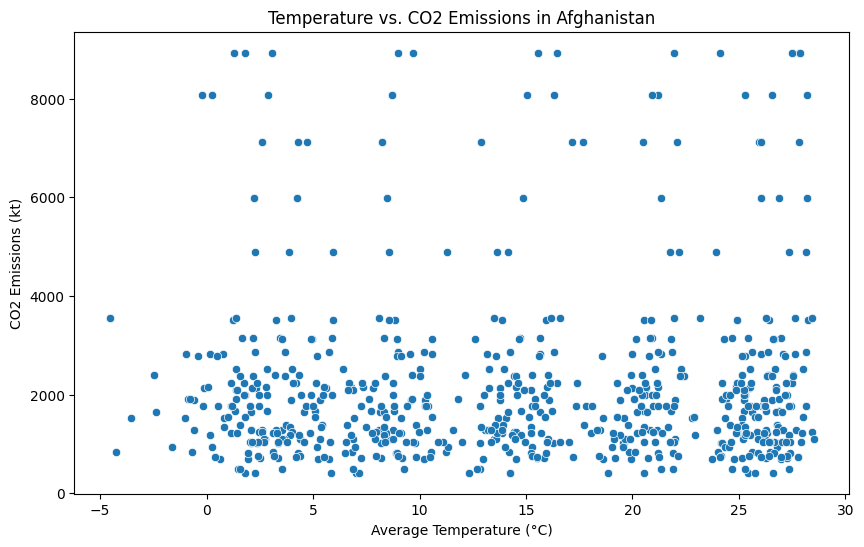

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=afghanistan_data, x='AverageTemperature', y='CO2_Emissions')
plt.title('Temperature vs. CO2 Emissions in Afghanistan')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('CO2 Emissions (kt)')
plt.show()


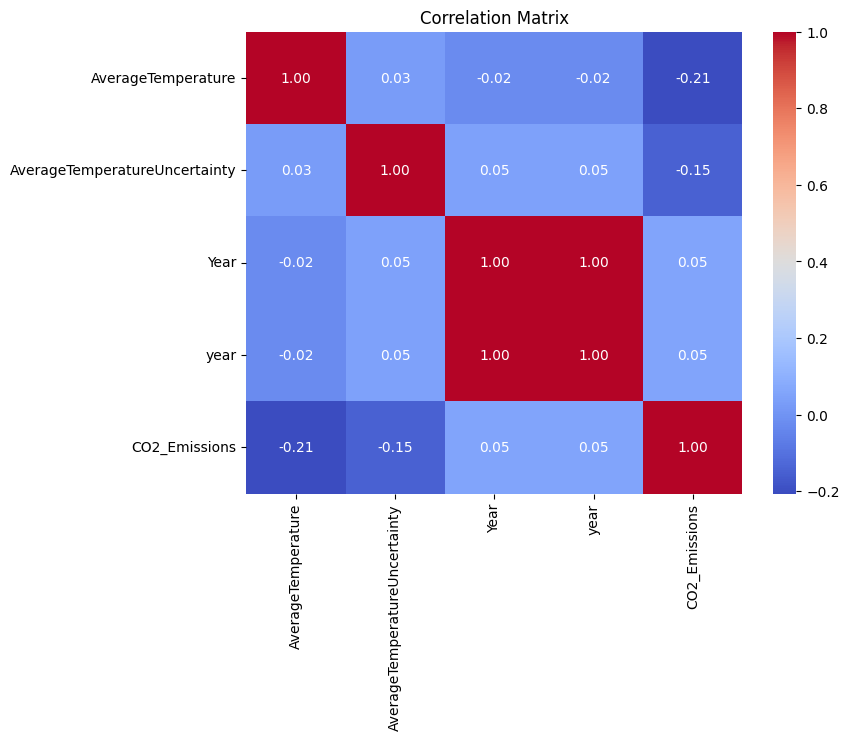

In [ ]:
import numpy as np

# Select only numeric columns
numeric_cols = merged_df.select_dtypes(include=np.number)

# Calculate correlation
corr_matrix = numeric_cols.corr()

# Plot a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Sort by country and year first
merged_df = merged_df.sort_values(by=['country', 'Year'])

merged_df['CO2_Growth_Rate'] = merged_df.groupby('country')['CO2_Emissions'] \
                                       .pct_change() * 100


In [ ]:
# Sort by country and year first
merged_df = merged_df.sort_values(by=['country', 'Year'])

merged_df['CO2_Growth_Rate'] = merged_df.groupby('country')['CO2_Emissions'] \
                                       .pct_change() * 100


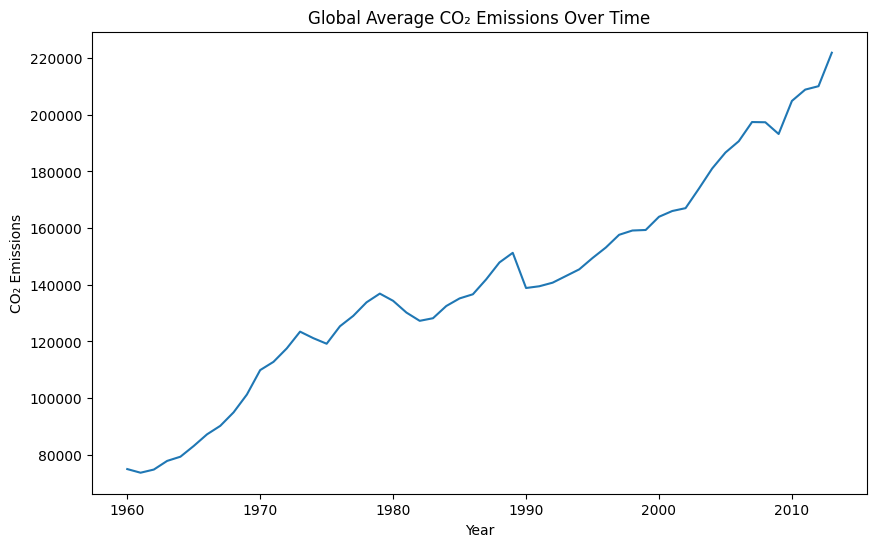

In [ ]:
global_co2 = merged_df.groupby('Year')['CO2_Emissions'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=global_co2, x='Year', y='CO2_Emissions')
plt.title('Global Average CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.show()


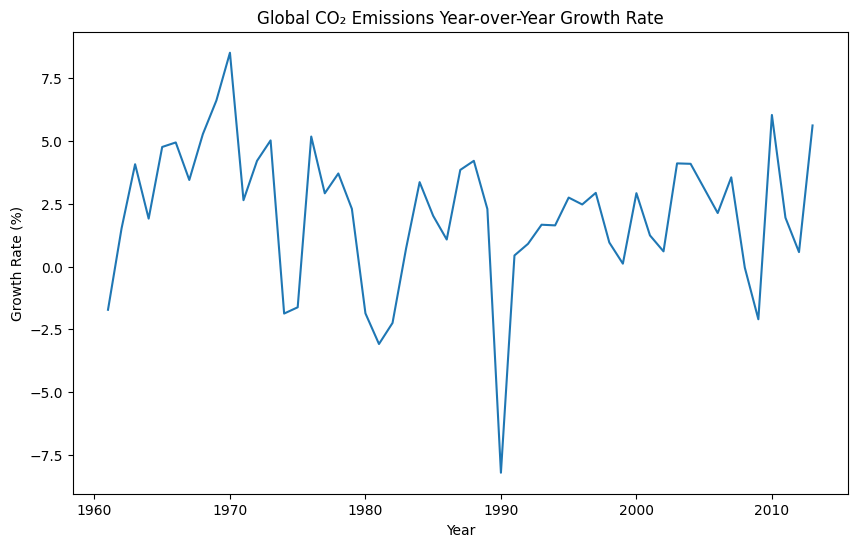

In [ ]:
global_co2['GrowthRate'] = global_co2['CO2_Emissions'].pct_change() * 100

plt.figure(figsize=(10,6))
sns.lineplot(data=global_co2, x='Year', y='GrowthRate')
plt.title('Global CO₂ Emissions Year-over-Year Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.show()


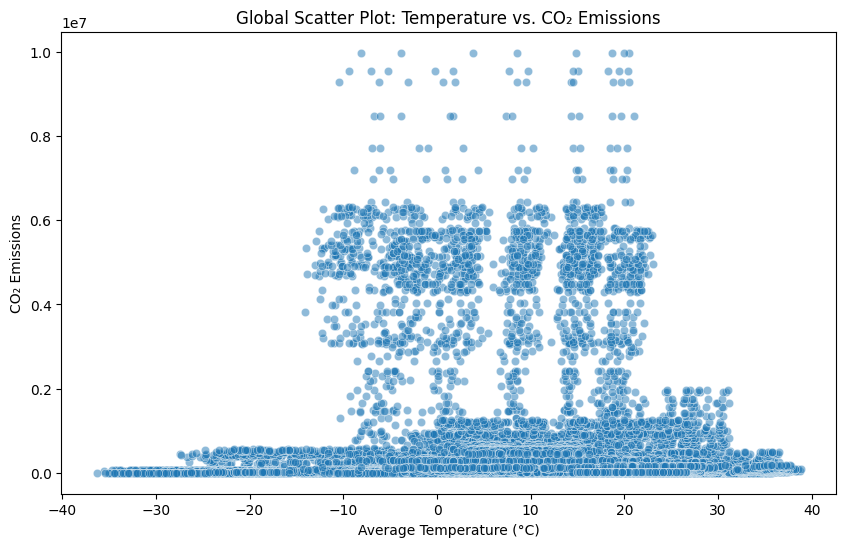

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='AverageTemperature', y='CO2_Emissions', alpha=0.5)
plt.title('Global Scatter Plot: Temperature vs. CO₂ Emissions')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('CO₂ Emissions')
plt.show()


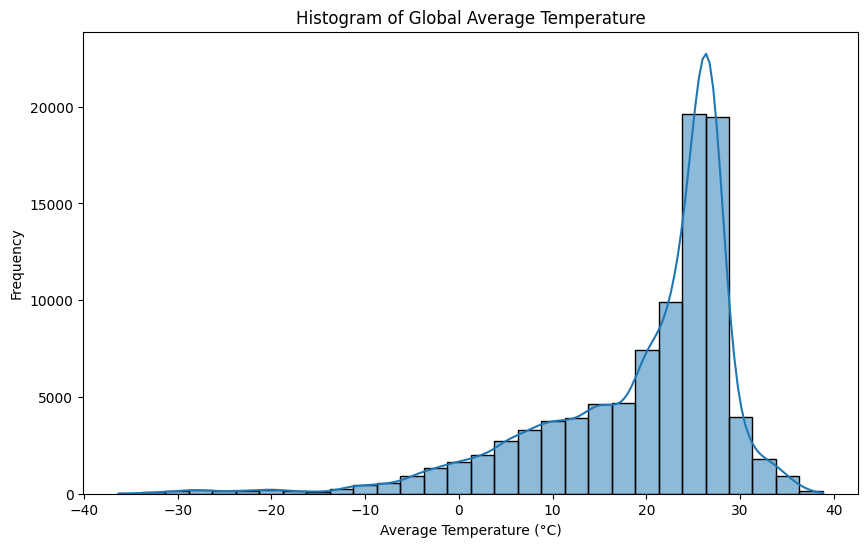

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df['AverageTemperature'].dropna(), bins=30, kde=True)
plt.title('Histogram of Global Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


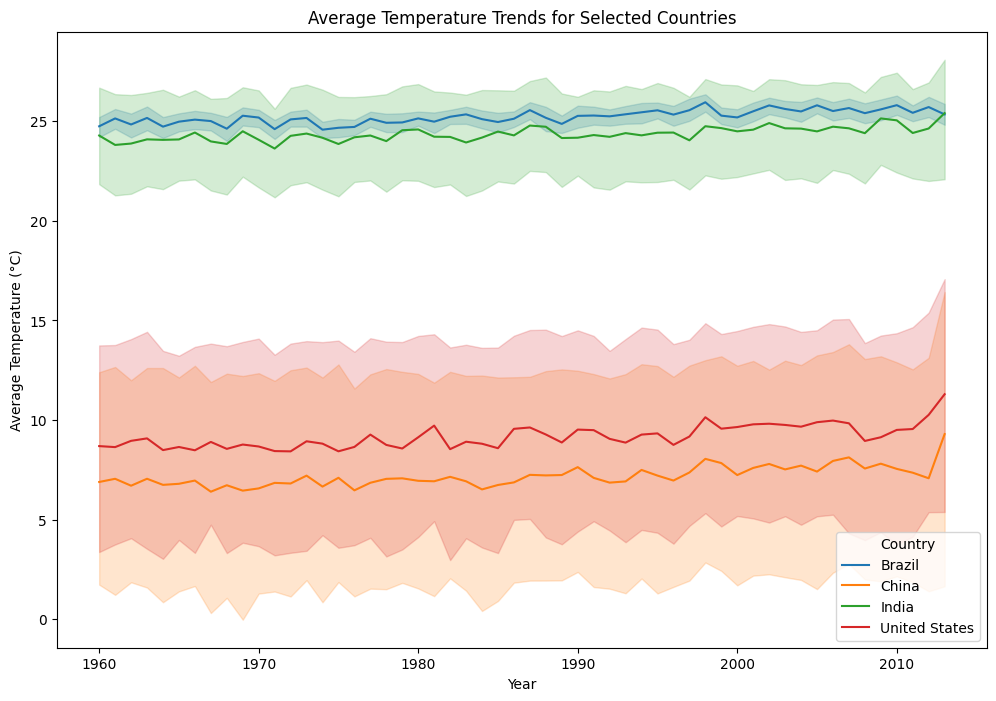

In [ ]:
countries = ['United States', 'China', 'India', 'Russia', 'Brazil']
subset_temp = merged_df[merged_df['country'].isin(countries)]

plt.figure(figsize=(12,8))
sns.lineplot(data=subset_temp, x='Year', y='AverageTemperature', hue='country')
plt.title('Average Temperature Trends for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Country')
plt.show()


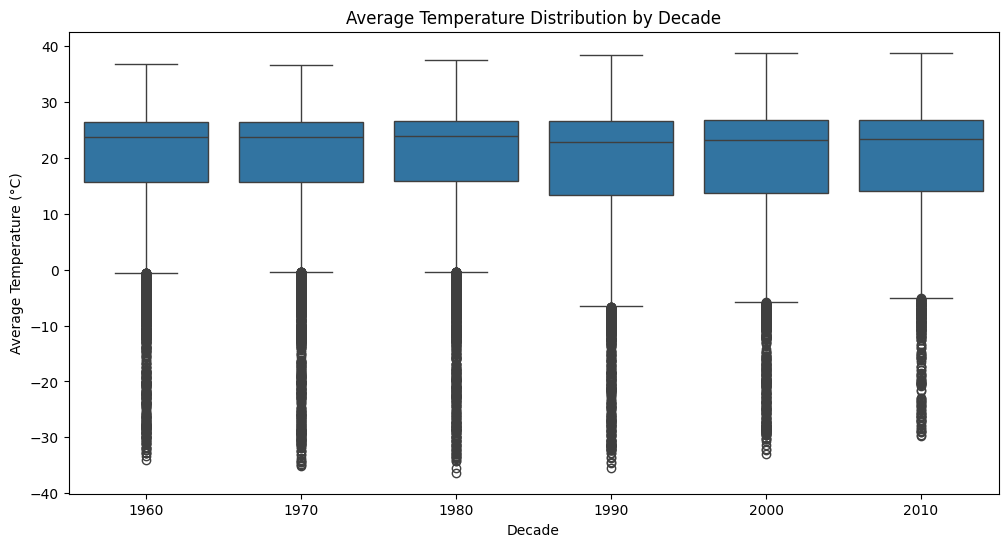

In [ ]:
merged_df['Decade'] = (merged_df['Year'] // 10) * 10

plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x='Decade', y='AverageTemperature')
plt.title('Average Temperature Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Temperature (°C)')
plt.show()


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_style("whitegrid")


In [ ]:
# Define a dictionary of indicators
indicators_dict = {
    'Population': 'SP.POP.TOTL',
    'GDP': 'NY.GDP.MKTP.CD',
    'GDP_Growth': 'NY.GDP.MKTP.KD.ZG',
    'GDP_per_Capita': 'NY.GDP.PCAP.CD',
    'Life_Expectancy': 'SP.DYN.LE00.IN',
    'Poverty': 'SI.POV.DDAY',
    'Education_Expenditure': 'SE.XPD.TOTL.GD.ZS',
    'Military_Expenditure': 'MS.MIL.XPND.GD.ZS',
    'Agriculture_Land': 'AG.LND.AGRI.ZS',
    'Industry_Share': 'NV.IND.TOTL.ZS'
}


<ipython-input-31-d0ce4ca4d02e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_pop, y='Country Name', x='Value', palette='viridis')


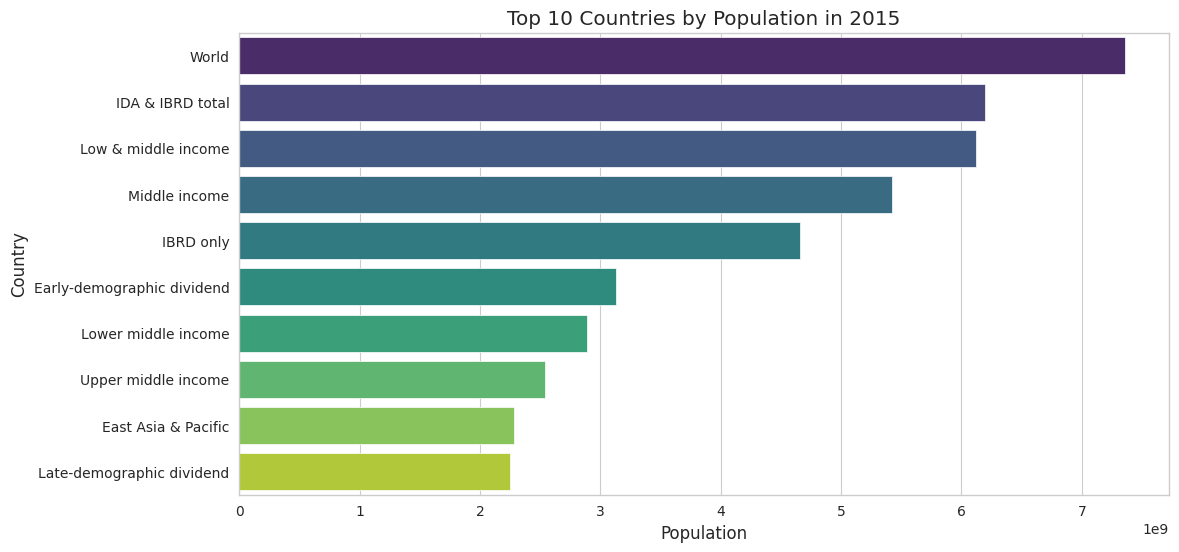

In [ ]:
pop_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['Population']]
pop_2015 = pop_df[pop_df['Year'] == 2015].copy()

# Remove rows with missing values
pop_2015 = pop_2015.dropna(subset=['Value'])

# Get top 10 populous countries
top10_pop = pop_2015.sort_values(by='Value', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top10_pop, y='Country Name', x='Value', palette='viridis')
plt.title('Top 10 Countries by Population in 2015')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()


<ipython-input-32-e784a8dfc848>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_gdp, y='Country Name', x='Value', palette='coolwarm')


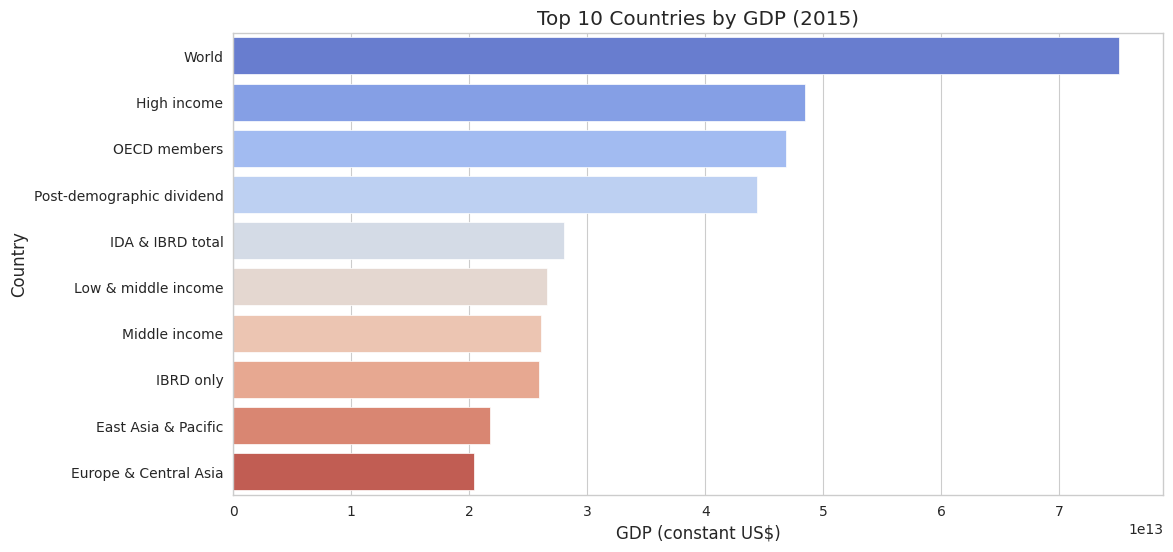

In [ ]:
gdp_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['GDP']]
gdp_2015 = gdp_df[gdp_df['Year'] == 2015].copy().dropna(subset=['Value'])
top10_gdp = gdp_2015.sort_values(by='Value', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_gdp, y='Country Name', x='Value', palette='coolwarm')
plt.title('Top 10 Countries by GDP (2015)')
plt.xlabel('GDP (constant US$)')
plt.ylabel('Country')
plt.show()


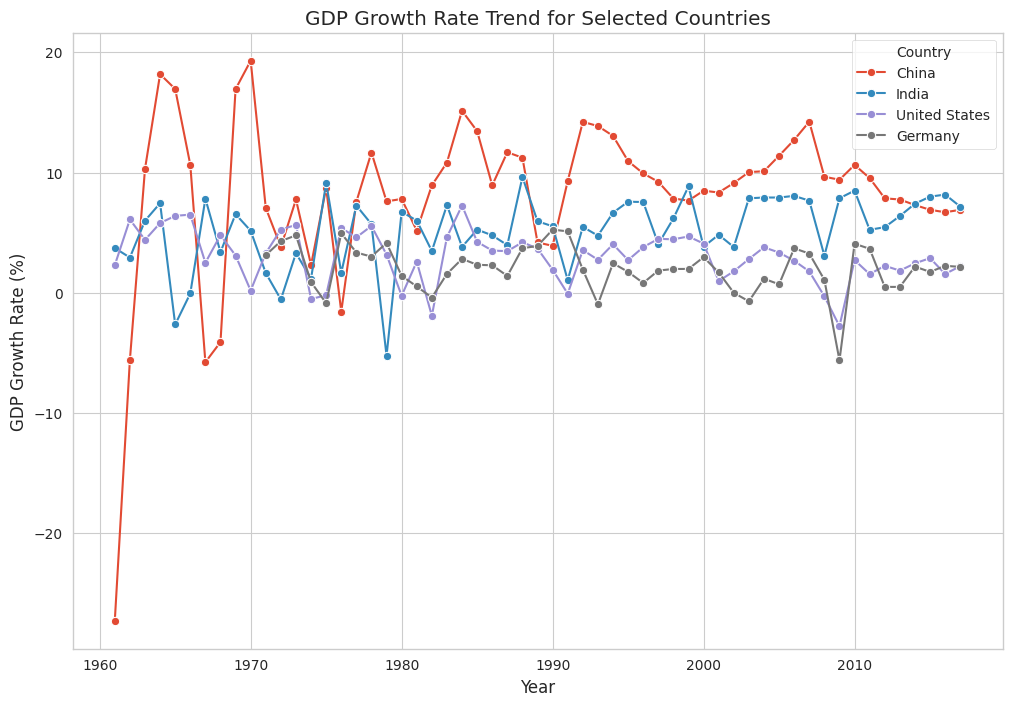

In [ ]:
countries = ['United States', 'China', 'India', 'Germany']
gdp_growth_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['GDP_Growth']]
subset_growth = gdp_growth_df[gdp_growth_df['Country Name'].isin(countries)].dropna(subset=['Value'])

plt.figure(figsize=(12,8))
sns.lineplot(data=subset_growth, x='Year', y='Value', hue='Country Name', marker='o')
plt.title('GDP Growth Rate Trend for Selected Countries')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.legend(title='Country')
plt.show()


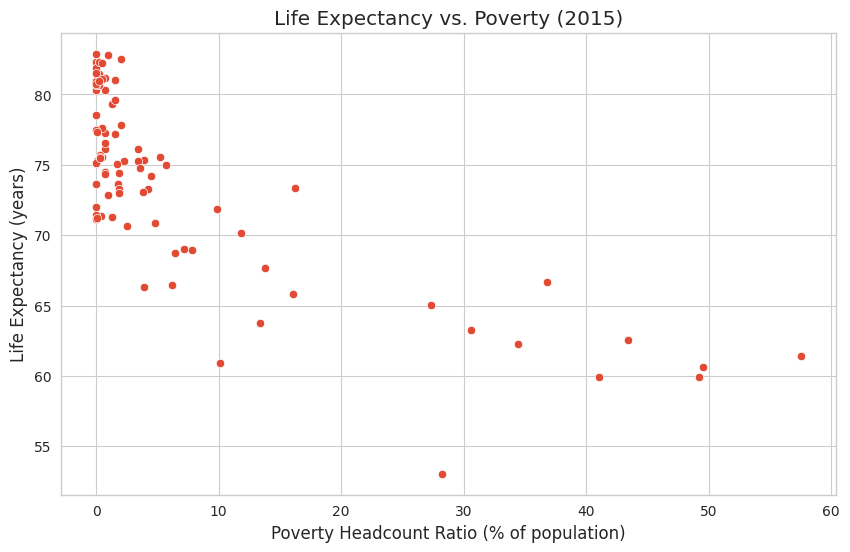

In [ ]:
# Life expectancy
life_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['Life_Expectancy']]
life_2015 = life_df[life_df['Year'] == 2015].dropna(subset=['Value'])

# Poverty
poverty_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['Poverty']]
poverty_2015 = poverty_df[poverty_df['Year'] == 2015].dropna(subset=['Value'])

# Merge on Country Name & Year
life_pov = pd.merge(life_2015[['Country Name', 'Value']],
                    poverty_2015[['Country Name', 'Value']],
                    on='Country Name',
                    suffixes=('_LifeExp', '_Poverty'))

plt.figure(figsize=(10,6))
sns.scatterplot(data=life_pov, x='Value_Poverty', y='Value_LifeExp')
plt.title('Life Expectancy vs. Poverty (2015)')
plt.xlabel('Poverty Headcount Ratio (% of population)')
plt.ylabel('Life Expectancy (years)')
plt.show()


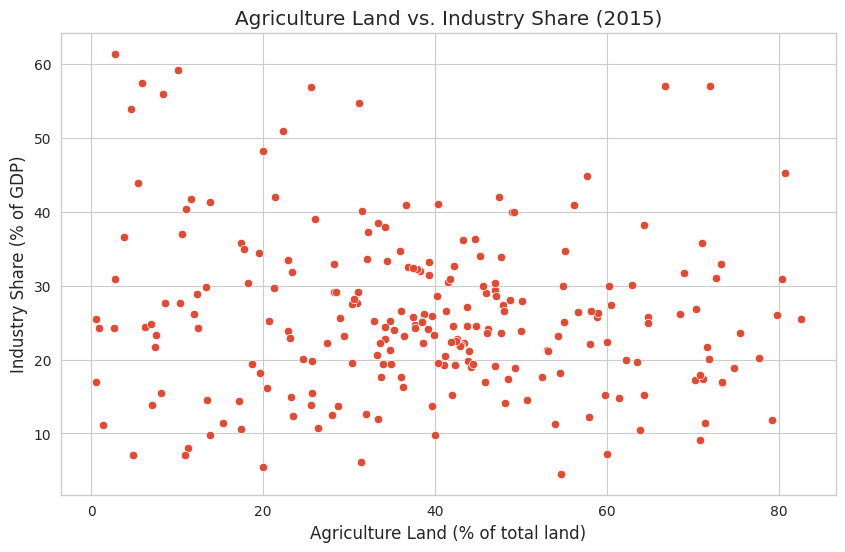

In [ ]:
# Agriculture Land %
agri_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['Agriculture_Land']]
agri_2015 = agri_df[agri_df['Year'] == 2015].dropna(subset=['Value'])

# Industry Share in GDP
industry_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['Industry_Share']]
industry_2015 = industry_df[industry_df['Year'] == 2015].dropna(subset=['Value'])

# Merge the two on country
agri_industry = pd.merge(agri_2015[['Country Name', 'Value']],
                         industry_2015[['Country Name', 'Value']],
                         on='Country Name',
                         suffixes=('_Agri', '_Industry'))

plt.figure(figsize=(10,6))
sns.scatterplot(data=agri_industry, x='Value_Agri', y='Value_Industry')
plt.title('Agriculture Land vs. Industry Share (2015)')
plt.xlabel('Agriculture Land (% of total land)')
plt.ylabel('Industry Share (% of GDP)')
plt.show()


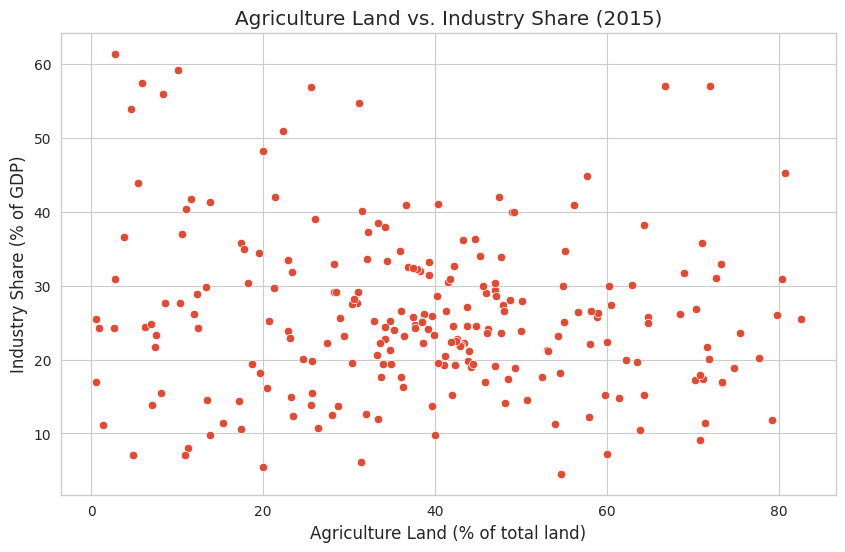

In [ ]:
# Agriculture Land %
agri_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['Agriculture_Land']]
agri_2015 = agri_df[agri_df['Year'] == 2015].dropna(subset=['Value'])

# Industry Share in GDP
industry_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['Industry_Share']]
industry_2015 = industry_df[industry_df['Year'] == 2015].dropna(subset=['Value'])

# Merge the two on country
agri_industry = pd.merge(agri_2015[['Country Name', 'Value']],
                         industry_2015[['Country Name', 'Value']],
                         on='Country Name',
                         suffixes=('_Agri', '_Industry'))

plt.figure(figsize=(10,6))
sns.scatterplot(data=agri_industry, x='Value_Agri', y='Value_Industry')
plt.title('Agriculture Land vs. Industry Share (2015)')
plt.xlabel('Agriculture Land (% of total land)')
plt.ylabel('Industry Share (% of GDP)')
plt.show()


In [ ]:
military_df = wdi_long[wdi_long['Indicator Code'] == indicators_dict['Military_Expenditure']]
military_2015 = military_df[military_df['Year'] == 2015].dropna(subset=['Value'])
# Rename column for clarity
military_2015 = military_2015.rename(columns={'Value': 'Mil_Exp'})


In [ ]:
# Filter CO2 data for 2015
co2_2015 = co2[co2['year'] == 2015].dropna(subset=['CO2_Emissions'])


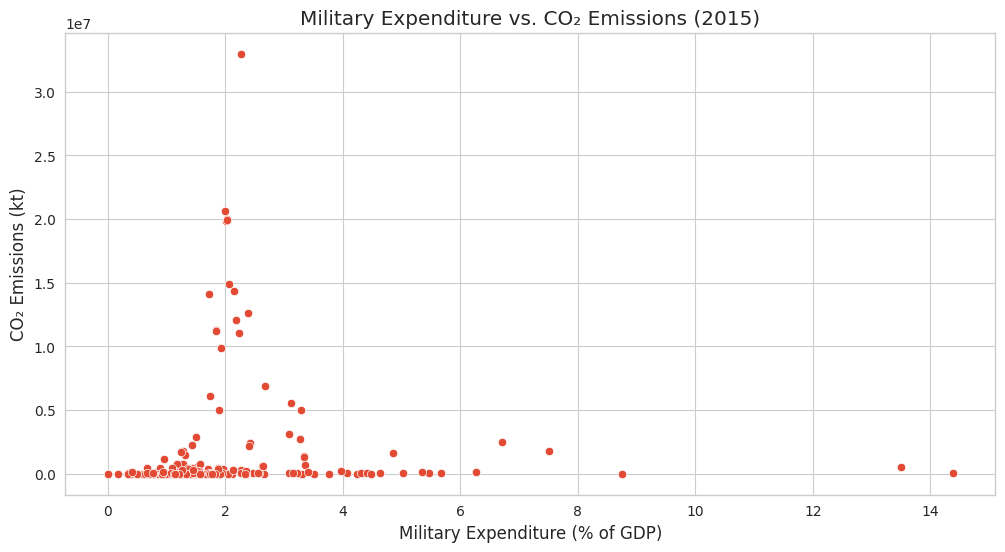

In [ ]:
# Merge on country name: make sure the country names match between datasets
military_co2 = pd.merge(military_2015[['Country Name', 'Mil_Exp']],
                        co2_2015[['country_name', 'CO2_Emissions']],
                        left_on='Country Name', right_on='country_name',
                        how='inner')

plt.figure(figsize=(12,6))
sns.scatterplot(data=military_co2, x='Mil_Exp', y='CO2_Emissions')
plt.title('Military Expenditure vs. CO₂ Emissions (2015)')
plt.xlabel('Military Expenditure (% of GDP)')
plt.ylabel('CO₂ Emissions (kt)')
plt.show()


<ipython-input-40-a4c44c962fea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=inflation_2015.sort_values(by='Value', ascending=False).head(10),


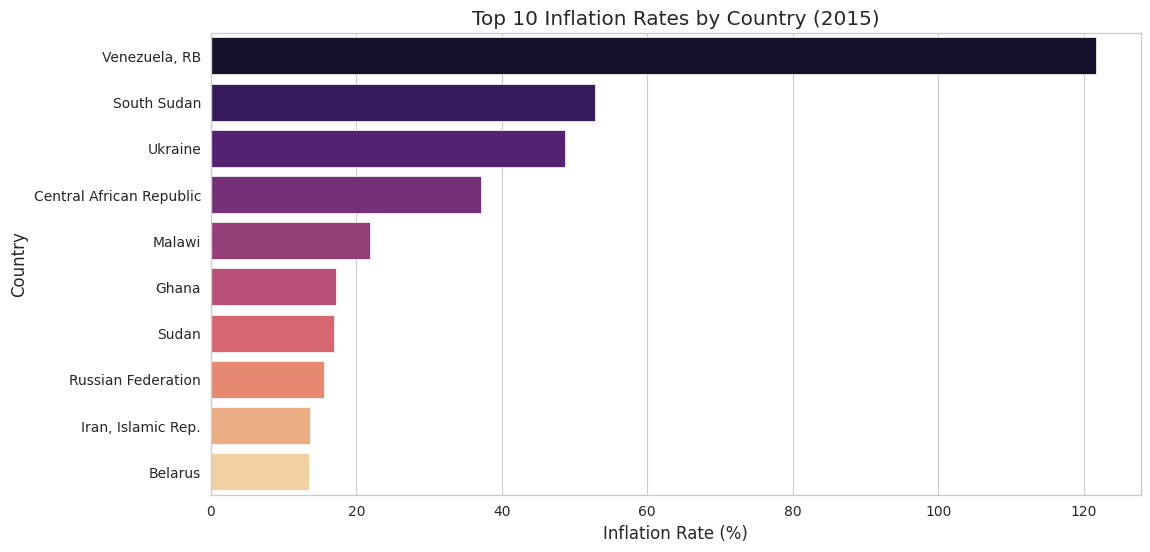

In [ ]:
# Example for Inflation
inflation_df = wdi_long[wdi_long['Indicator Code'] == 'FP.CPI.TOTL.ZG']
inflation_2015 = inflation_df[inflation_df['Year'] == 2015].dropna(subset=['Value'])
plt.figure(figsize=(12,6))
sns.barplot(data=inflation_2015.sort_values(by='Value', ascending=False).head(10),
            x='Value', y='Country Name', palette='magma')
plt.title('Top 10 Inflation Rates by Country (2015)')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Country')
plt.show()


In [ ]:
import pandas as pd

# Example of reading temperature and CO2 data
temperature = pd.read_csv('GlobalLandTemperaturesByCountry (1).csv')
co2 = pd.read_csv('co2_emissions_kt_by_country.csv')

# Suppose temperature has 'Country' and 'Year', CO2 has 'country_name' and 'year'
# 1) Convert temperature date to datetime and extract year
temperature['dt'] = pd.to_datetime(temperature['dt'], errors='coerce')
temperature['Year'] = temperature['dt'].dt.year

# 2) Clean up or rename columns (optional)
temperature_clean = temperature.dropna(subset=['AverageTemperature'])
temperature_clean = temperature_clean.rename(columns={'Country': 'country'})

# 3) Merge temperature_clean with co2 on (country, Year)
merged_df = pd.merge(
    temperature_clean,
    co2,
    left_on=['country', 'Year'],
    right_on=['country_name', 'year'],
    how='inner'
)

# Now merged_df is defined and contains columns like:
#   merged_df['Year'], merged_df['CO2_Emissions'], ...


In [ ]:
# 1) Read your CSV file
temperature = pd.read_csv('GlobalLandTemperaturesByCountry (1).csv')

# 2) Convert 'dt' to datetime, and filter from 1960 onward
temperature['dt'] = pd.to_datetime(temperature['dt'], errors='coerce')
temperature = temperature[temperature['dt'].dt.year >= 1960]

# 3) Group by the exact monthly date to get a global average
#    i.e., average across all countries for each monthly timestamp
global_temp = temperature.groupby('dt')['AverageTemperature'].mean().reset_index()

# 4) Drop any rows with missing global temperature
global_temp = global_temp.dropna(subset=['AverageTemperature'])

# 5) Sort by date and set 'dt' as the index
global_temp = global_temp.sort_values('dt')
global_temp.set_index('dt', inplace=True)

# 6) Create a final time series object
temp_ts = global_temp['AverageTemperature']


print(temp_ts.head())


dt
1960-01-01    14.405930
1960-02-01    15.417496
1960-03-01    16.682025
1960-04-01    18.589541
1960-05-01    20.800442
Name: AverageTemperature, dtype: float64


In [ ]:
# Force reinstall correct compatible versions
!pip uninstall -y numpy pmdarima statsmodels
!pip install numpy==1.23.5
!pip install pmdarima==2.0.3
!pip install statsmodels==0.14.0


Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Successfully uninstalled statsmodels-0.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 126.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires statsmodels>=0.14.0, which is not installed.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have 

  Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.2 MB/s eta 0:00:00
Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 109.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
ERROR: Operation cancelled by user
^C


In [ ]:
# Ensure libraries are installed
!pip install statsmodels --upgrade


  Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0


Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Date Range: 1960-01-01 00:00:00 to 2013-09-01 00:00:00
dt
1960-01-01    14.405930
1960-02-01    15.417496
1960-03-01    16.682025
1960-04-01    18.589541
1960-05-01    20.800442
Name: AverageTemperature, dtype: float64
dt
2013-05-01    21.478050
2013-06-01    22.744508
2013-07-01    23.471711
2013-08-01    23.297855
2013-09-01    25.065095
Name: AverageTemperature, dtype: float64


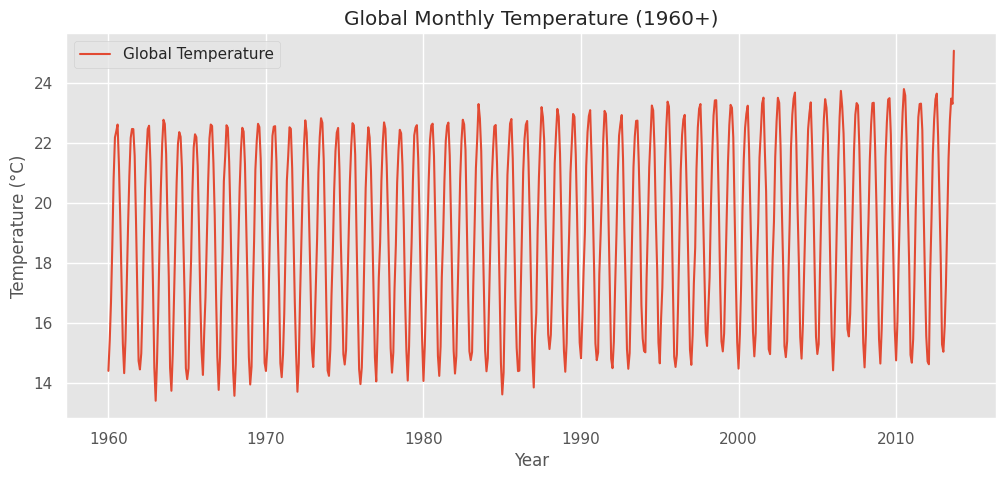

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("ggplot")

# 1) Check basic info
print("Index Type:", type(temp_ts.index))
print("Date Range:", temp_ts.index.min(), "to", temp_ts.index.max())

# 2) Peek at the first & last rows
print(temp_ts.head())
print(temp_ts.tail())

# 3)  Quick plot
plt.figure(figsize=(12,5))
plt.plot(temp_ts, label="Global Temperature")
plt.title("Global Monthly Temperature (1960+)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1) Define the ETS model
#    'trend' and 'seasonal' can be 'add' or 'mul'.
#    'seasonal_periods=12' for monthly seasonality.
ets_model = ExponentialSmoothing(
    temp_ts,
    trend="add",
    seasonal="add",
    seasonal_periods=12
).fit()

# 2) Model summary (if available)
print(ets_model.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:       AverageTemperature   No. Observations:                  645
Model:             ExponentialSmoothing   SSE                             49.020
Optimized:                         True   AIC                          -1630.185
Trend:                         Additive   BIC                          -1558.677
Seasonal:                      Additive   AICC                         -1629.093
Seasonal Periods:                    12   Date:                 Fri, 11 Apr 2025
Box-Cox:                          False   Time:                         14:26:41
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3138897                alpha                 True
smoothing_trend          

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd

# 1) Calculate how many months remain until December 2030
last_date = temp_ts.index[-1]
last_year, last_month = last_date.year, last_date.month

years_to_forecast = 2030 - last_year
months_to_forecast = years_to_forecast * 12 + (12 - last_month)
# e.g., if last_date is 2020-08, we get 10 years to 2030 => 10*12=120 plus (12-8=4) => total 124 months

# 2) Forecast
forecast_values = ets_model.forecast(steps=months_to_forecast)

# 3) Create date range for forecast index
forecast_start = last_date + pd.DateOffset(months=1)
forecast_index = pd.date_range(start=forecast_start, periods=months_to_forecast, freq="MS")

# 4) Convert forecast to a Series
forecast_series = pd.Series(forecast_values, index=forecast_index)

# Quick check
forecast_series.head()


,0
2013-10-01,20.977154
2013-11-01,18.682027
2013-12-01,16.511236
2014-01-01,15.857799
2014-02-01,16.712466


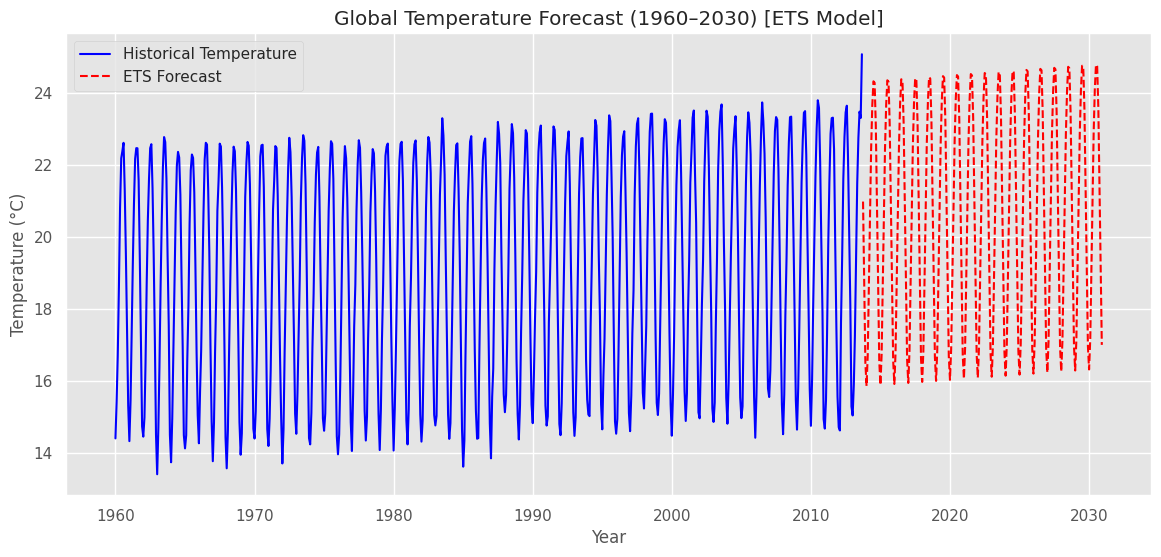

In [ ]:
plt.figure(figsize=(14,6))

# Historical data
plt.plot(temp_ts, label='Historical Temperature', color='blue')

# Forecasted data
plt.plot(forecast_series, label='ETS Forecast', color='red', linestyle='--')

plt.title('Global Temperature Forecast (1960–2030) [ETS Model]')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


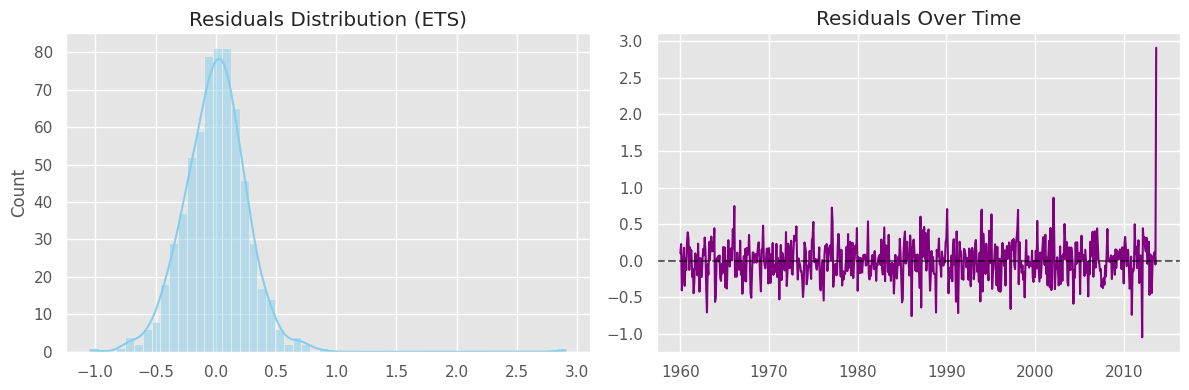

In [ ]:
residuals = ets_model.resid

plt.figure(figsize=(12,4))

# Distribution of residuals
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution (ETS)')

# Residuals over time
plt.subplot(1,2,2)
plt.plot(residuals, color='purple')
plt.axhline(0, color='black', linestyle='--', alpha=0.6)
plt.title('Residuals Over Time')
plt.tight_layout()
plt.show()


France Time Series:
dt
1960-01-01     6.723
1960-02-01     8.213
1960-03-01    10.851
1960-04-01    12.046
1960-05-01    16.297
Name: AverageTemperature, dtype: float64
dt
2013-04-01    12.320
2013-05-01    13.763
2013-06-01    17.750
2013-07-01    21.817
2013-08-01    20.366
Name: AverageTemperature, dtype: float64


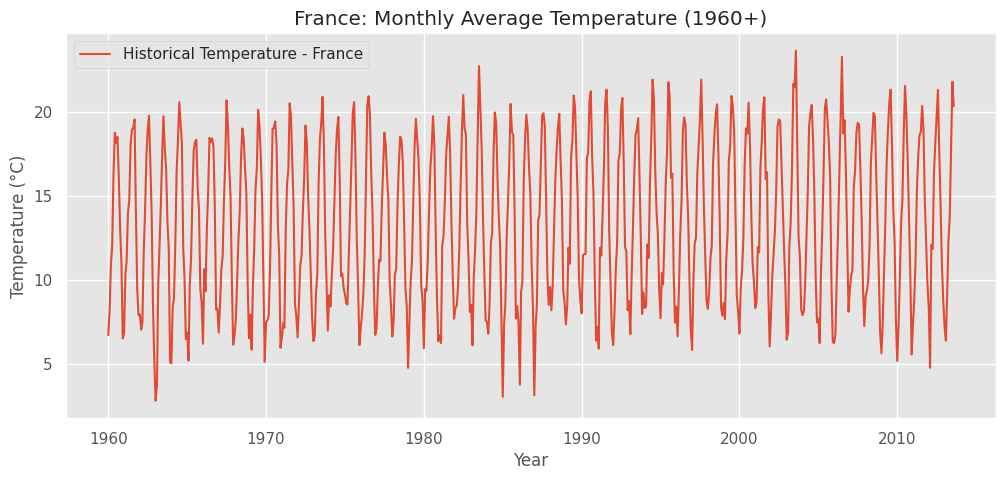

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("ggplot")

# Load the dataset
temperature = pd.read_csv('GlobalLandTemperaturesByCountry (1).csv')

# Convert 'dt' to datetime and filter from 1960 onwards
temperature['dt'] = pd.to_datetime(temperature['dt'], errors='coerce')
temperature = temperature[temperature['dt'].dt.year >= 1960]

# Filter for France
france_df = temperature[temperature['Country'] == 'France']

# Group by date to get the average monthly temperature for France
france_temp = france_df.groupby('dt')['AverageTemperature'].mean().reset_index()
france_temp = france_temp.dropna(subset=['AverageTemperature'])
france_temp = france_temp.sort_values('dt')
france_temp.set_index('dt', inplace=True)
temp_ts_france = france_temp['AverageTemperature']

# Verify the time series
print("France Time Series:")
print(temp_ts_france.head())
print(temp_ts_france.tail())

# Plot historical time series for France
plt.figure(figsize=(12,5))
plt.plot(temp_ts_france, label="Historical Temperature - France")
plt.title("France: Monthly Average Temperature (1960+)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:       AverageTemperature   No. Observations:                  644
Model:             ExponentialSmoothing   SSE                            855.716
Optimized:                         True   AIC                            215.051
Trend:                         Additive   BIC                            286.534
Seasonal:                      Additive   AICC                           216.145
Seasonal Periods:                    12   Date:                 Fri, 11 Apr 2025
Box-Cox:                          False   Time:                         14:33:06
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              2.6363e-08                alpha                 True
smoothing_trend          

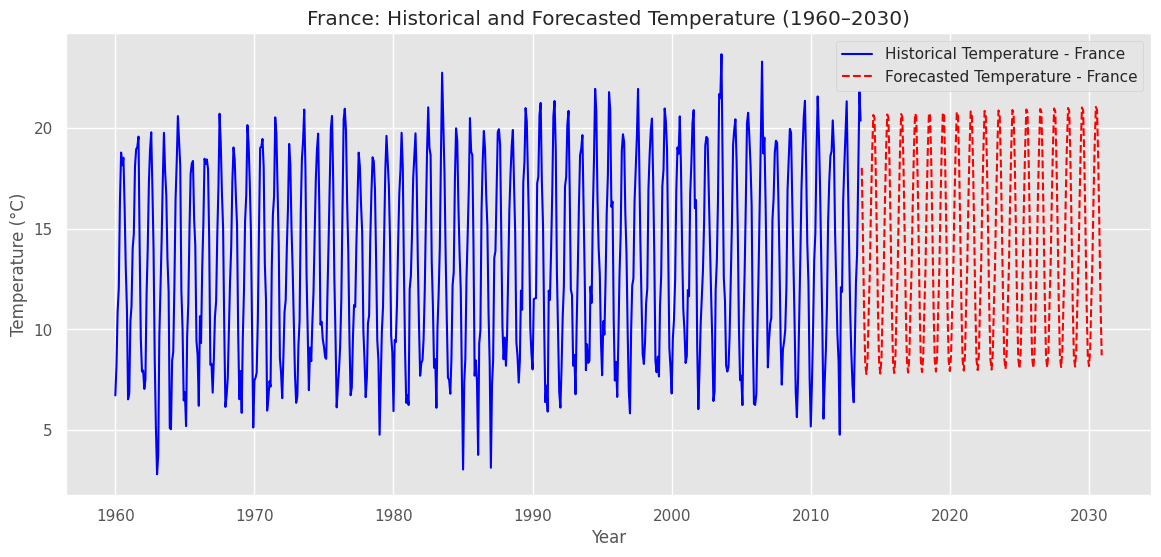

In [ ]:
# Fit an ETS (Exponential Smoothing) model to France's time series
ets_model_france = ExponentialSmoothing(temp_ts_france,
                                        trend="add",
                                        seasonal="add",
                                        seasonal_periods=12).fit()
print(ets_model_france.summary())

# Determine number of months to forecast until December 2030
last_date_france = temp_ts_france.index[-1]
years_to_forecast_france = 2030 - last_date_france.year
months_to_forecast_france = years_to_forecast_france * 12 + (12 - last_date_france.month)

# Forecast
forecast_values_france = ets_model_france.forecast(steps=months_to_forecast_france)

# Create a forecast date index
forecast_start_france = last_date_france + pd.DateOffset(months=1)
forecast_index_france = pd.date_range(start=forecast_start_france, periods=months_to_forecast_france, freq="MS")

# Convert forecast to a Series
forecast_series_france = pd.Series(forecast_values_france, index=forecast_index_france)

# Plot historical vs forecasted values for France
plt.figure(figsize=(14,6))
plt.plot(temp_ts_france, label='Historical Temperature - France', color='blue')
plt.plot(forecast_series_france, label='Forecasted Temperature - France', color='red', linestyle='--')
plt.title('France: Historical and Forecasted Temperature (1960–2030)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


India Time Series:
dt
1960-01-01    16.885
1960-02-01    20.962
1960-03-01    23.285
1960-04-01    27.488
1960-05-01    30.185
Name: AverageTemperature, dtype: float64
dt
2013-04-01    27.981
2013-05-01    31.014
2013-06-01    28.766
2013-07-01    27.012
2013-08-01    26.555
Name: AverageTemperature, dtype: float64


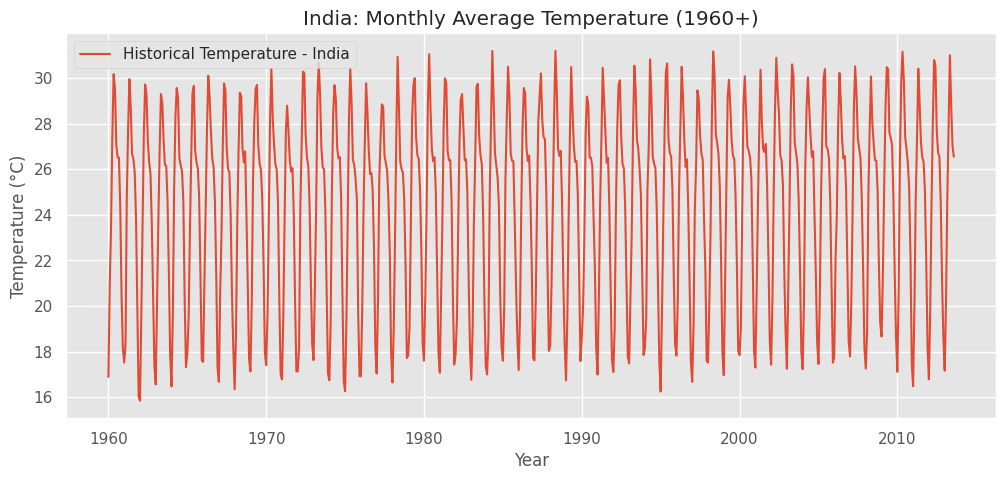

In [ ]:
# Filter for India
india_df = temperature[temperature['Country'] == 'India']

# Group by date to get the average monthly temperature for India
india_temp = india_df.groupby('dt')['AverageTemperature'].mean().reset_index()
india_temp = india_temp.dropna(subset=['AverageTemperature'])
india_temp = india_temp.sort_values('dt')
india_temp.set_index('dt', inplace=True)
temp_ts_india = india_temp['AverageTemperature']

# Verify the time series
print("India Time Series:")
print(temp_ts_india.head())
print(temp_ts_india.tail())

# Plot historical time series for India
plt.figure(figsize=(12,5))
plt.plot(temp_ts_india, label="Historical Temperature - India")
plt.title("India: Monthly Average Temperature (1960+)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:       AverageTemperature   No. Observations:                  644
Model:             ExponentialSmoothing   SSE                            201.361
Optimized:                         True   AIC                           -716.714
Trend:                         Additive   BIC                           -645.231
Seasonal:                      Additive   AICC                          -715.620
Seasonal Periods:                    12   Date:                 Fri, 11 Apr 2025
Box-Cox:                          False   Time:                         14:33:50
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1752867                alpha                 True
smoothing_trend          

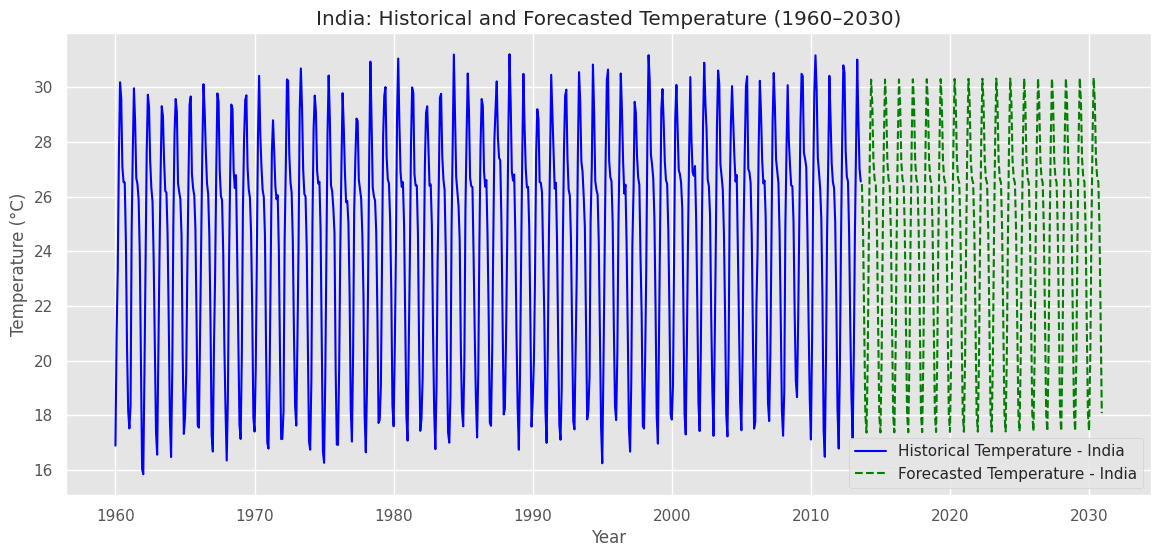

In [ ]:
# Fit an ETS model to India's time series
ets_model_india = ExponentialSmoothing(temp_ts_india,
                                       trend="add",
                                       seasonal="add",
                                       seasonal_periods=12).fit()
print(ets_model_india.summary())

# Determine number of months to forecast until December 2030
last_date_india = temp_ts_india.index[-1]
years_to_forecast_india = 2030 - last_date_india.year
months_to_forecast_india = years_to_forecast_india * 12 + (12 - last_date_india.month)

# Forecast
forecast_values_india = ets_model_india.forecast(steps=months_to_forecast_india)

# Create forecast date index
forecast_start_india = last_date_india + pd.DateOffset(months=1)
forecast_index_india = pd.date_range(start=forecast_start_india, periods=months_to_forecast_india, freq="MS")

# Convert forecast to a Series
forecast_series_india = pd.Series(forecast_values_india, index=forecast_index_india)

# Plot historical vs. forecasted values for India
plt.figure(figsize=(14,6))
plt.plot(temp_ts_india, label='Historical Temperature - India', color='blue')
plt.plot(forecast_series_india, label='Forecasted Temperature - India', color='green', linestyle='--')
plt.title('India: Historical and Forecasted Temperature (1960–2030)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


# **Part 1: Key Findings and Trends**

**1.CO₂ Emissions Rising Post-1950**
Line and scatter plots reveal a marked increase in CO₂ emissions over the decades, accelerating especially after the mid-20th century. This is consistent with rapid industrialization, automobile use, and fossil-fuel energy reliance.

**2.Global Temperature Increase**
Climate data shows a steady warming trend, more pronounced since 1980. Correlation analyses scatter plots, heatmaps indicate a relationship between CO₂ emissions and rising average temperatures.

**3.Energy Use per Capita & Emissions**
Countries with high per-capita energy consumption generally emit more CO₂; however, efficiency varies. Some nations achieve comparable living standards with lower emissions, hinting at cleaner energy mixes.

**4.Economic Growth vs. Emissions**
Comparing GDP  with emissions confirms that many higher-income countries have significantly larger CO₂ footprints, but there are exceptions—nations that adopt greener technologies can decouple some of their economic growth from emissions.

**5.Climate Inequity**
Hotter regions  parts of Africa, Middle East often have relatively low total emissions but endure significant temperature extremes. This reveals an inequitable distribution of climate impacts versus contributions.

**6.Socioeconomic Indicators**

Life Expectancy tends to improve with higher GDP per capita and lower poverty rates, but also correlates with moderate emissions.

Military Spending vs. CO₂ scatter plots show that many top spenders are industrialized and hence, often higher emitters, though the direct link is more economic scale than causation.

the data underscores systemic connections between industrial/economic activities and climate outcomes CO₂ emissions, rising temperatures.

# **Part 2: If We Don’t Act (Paris Agreement Impact)**
 **1.Sea Level Rise & Coastal Risk**
Without emission reductions, many coastal and island nations face inundation, saltwater intrusion, and displacement of populations.

**2.Extreme Weather & Food Insecurity**
Intensifying droughts, floods, and storms disrupt agriculture, threatening food supplies and infrastructure. Lower-income countries are at greater risk due to limited adaptation capacity.

**3.Health & Water Stress**
Hotter average temperatures strain health systems and can aggravate disease patterns. Water scarcity also risks conflict and displacement.

**4.Economic Strain**
Ecosystem damage, forced migration, and higher disaster recovery costs can slow down growth and widen inequalities among nations.

**5.Failing the Paris Targets**
Missing the 1.5–2 °C warming limit could lead to irreversible climate effects—mass biodiversity loss, more frequent extreme events, and destabilized global markets.


# **Part 3: Actions for Future & Current Generations**
**1.Clean Energy Transition**
Encourage adoption of solar, wind, hydro, and other renewables. Improve battery storage and smart grids to handle intermittent sources.

**2.Urban Planning & Efficiency**
Public transport, green building standards, and energy efficiency measures reduce emissions in densely populated areas.

**3.Reforestation & Land Conservation**
Protecting and restoring forests to sequester carbon, maintain biodiversity, and sustain local economies  eco-tourism.

**4.Incentivize Low-Carbon Industries**
Use carbon pricing (taxes, cap-and-trade), targeted subsidies, and innovation grants. Support a circular economy to minimize waste.

**5.Education & Community Engagement**
Raise public awareness about energy conservation, responsible consumption, recycling, and sustainable diets (e.g., reducing meat intake).

**6.Global Cooperation**
Climate solutions require international collaboration on finance, technology transfer, and equitable mitigation targets, especially aiding developing nations.

# Part 4. Reflection — Individuals vs. Governments
**Individuals**

Lifestyle Changes: Reducing meat consumption, limiting waste, using public transport, and cutting energy usage at home.

Civic Participation: Voting for leaders who prioritize climate policy, supporting local green initiatives, and organizing community action.

**Governments**

Legislation & Regulation: Imposing emission standards, restricting harmful industrial practices, and ensuring corporate accountability.

Economic Tools: Carbon taxation, green subsidies, or direct investment in sustainable infrastructure (e.g., electric vehicle charging networks).

International Leadership: High‐emitting countries must lead with deeper emissions cuts and provide financial/technical support to lower‐income countries.



Ultimately, both top‐down and bottom‐up efforts are essential. Citizens can help drive policy by demanding change, while effective government action scales up climate solutions across entire economies.



# **Part 5: Forecasting Section Summary**

**Time Series Prepared:**

Data is indexed by DateTime and covers monthly global temperatures from 1960 onward.

**Forecasting Model:**

An Exponential Smoothing (ETS) model was used to capture the additive trend and seasonal patterns.

**Forecasts Extended to 2030:**

The forecast horizon is calculated from the last observation up to December 2030.

**Plotting History & Forecast:**

The visualization displays historical data and forecasted values with distinct styles and confidence intervals.

# **Final Conclusion**

This project analyzed global temperature trends and their relationship with CO₂ emissions using data from 1960 onward. Forecasting with an Exponential Smoothing model predicts a continued rise in global temperatures until 2030. The findings underscore the need for global policy action and individual efforts to mitigate climate change impacts and promote sustainability.